In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
df_quater = pd.read_csv('/content/drive/MyDrive/빅예분3조/Data/prescale/KPU_DATA_MERGE1_4Q.csv', encoding='euc-kr')

In [6]:
df_state = pd.read_csv('/content/drive/MyDrive/빅예분3조/Data/prescale//KPU_DATA_MERGE1_STATE.csv', encoding='euc-kr')

In [7]:
#파이썬 컬럼 다 나오도록
pd.set_option('display.max_columns', None)

In [8]:
df_quater.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         275 non-null    int64 
 1   PLCST_NM           275 non-null    object
 2   1Q_TIZN_1          275 non-null    int64 
 3   1Q_TIZN_2          275 non-null    int64 
 4   1Q_TIZN_3          275 non-null    int64 
 5   1Q_TIZN_4          275 non-null    int64 
 6   1Q_OCRN_DOTW_SNDD  275 non-null    int64 
 7   1Q_OCRN_DOTW_MON   275 non-null    int64 
 8   1Q_OCRN_DOTW_TUE   275 non-null    int64 
 9   1Q_OCRN_DOTW_WED   275 non-null    int64 
 10  1Q_OCRN_DOTW_THU   275 non-null    int64 
 11  1Q_OCRN_DOTW_FRI   275 non-null    int64 
 12  1Q_OCRN_DOTW_SAT   275 non-null    int64 
 13  2Q_TIZN_1          275 non-null    int64 
 14  2Q_TIZN_2          275 non-null    int64 
 15  2Q_TIZN_3          275 non-null    int64 
 16  2Q_TIZN_4          275 non-null    int64 
 1

In [9]:
df_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8465 non-null   int64  
 1   Unnamed: 0.1          8465 non-null   int64  
 2   ACPT_YM               8465 non-null   int64  
 3   PLCST_NM              8465 non-null   object 
 4   RPRT_CASCNT_WHOL      8465 non-null   int64  
 5   TIZN_1                8465 non-null   int64  
 6   TIZN_2                8465 non-null   int64  
 7   TIZN_3                8465 non-null   int64  
 8   TIZN_4                8465 non-null   int64  
 9   OCRN_DOTW_SNDD        8465 non-null   int64  
 10  OCRN_DOTW_MON         8465 non-null   int64  
 11  OCRN_DOTW_TUE         8465 non-null   int64  
 12  OCRN_DOTW_WED         8465 non-null   int64  
 13  OCRN_DOTW_THU         8465 non-null   int64  
 14  OCRN_DOTW_FRI         8465 non-null   int64  
 15  OCRN_DOTW_SAT        

In [10]:
df_plcst_nm = df_state['PLCST_NM']
plsct_nm_list = df_plcst_nm.to_list()
plsct_nm_list = list(set(plsct_nm_list))

In [11]:
target_column_list = ['TIZN_1','TIZN_2','TIZN_3','TIZN_4','OCRN_DOTW_SNDD','OCRN_DOTW_MON','OCRN_DOTW_TUE','OCRN_DOTW_WED','OCRN_DOTW_THU','OCRN_DOTW_FRI','OCRN_DOTW_SAT']

In [12]:
# 예측값 컬럼 정의
df_state['PREDICTED_TIZN_1'] = 0.0
df_state['PREDICTED_TIZN_2'] = 0.0
df_state['PREDICTED_TIZN_3'] = 0.0
df_state['PREDICTED_TIZN_4'] = 0.0
df_state['PREDICTED_OCRN_DOTW_SNDD'] = 0.0
df_state['PREDICTED_OCRN_DOTW_MON'] = 0.0
df_state['PREDICTED_OCRN_DOTW_TUE'] = 0.0
df_state['PREDICTED_OCRN_DOTW_WED'] = 0.0
df_state['PREDICTED_OCRN_DOTW_THU'] = 0.0
df_state['PREDICTED_OCRN_DOTW_FRI'] = 0.0
df_state['PREDICTED_OCRN_DOTW_SAT'] = 0.0

In [13]:
def get_yymmlist(plcst_nm):
  df_yymm = df_state['ACPT_YM'][df_state['PLCST_NM']== plcst_nm]
  yymm_list = df_yymm.to_list()
  yymm_list = list(set(yymm_list))
  yymm_list.sort()
  return yymm_list

In [14]:
# 1. 상태천이 횟수 행렬 만들기

In [15]:
# 13분 소요
for plsct_nm in plsct_nm_list:
  print(plsct_nm)

  for tgt in target_column_list:
    print(tgt)
    state_array = np.array([[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]])
    yymm_list = get_yymmlist(plsct_nm)

    init_array = np.array([0.0,0.0,0.0,0.0])

    for v in df_state[(df_state['PLCST_NM']==plsct_nm)].groupby(tgt+'_STATE').size().keys():
      init_array[int(v)-1] = df_state[(df_state['PLCST_NM']==plsct_nm)].groupby(tgt+'_STATE').size()[v]

    total = df_state[(df_state['PLCST_NM']==plsct_nm)].groupby(tgt+'_STATE').size().values.sum()
    init_array = init_array/total

    print(init_array)

    for i in range(len(yymm_list)-1):
      if df_state[tgt+'_STATE'][(df_state['PLCST_NM']==plsct_nm) & (df_state['ACPT_YM'] == yymm_list[i])].values[0] == 1:
        if df_state[tgt+'_STATE'][(df_state['PLCST_NM']==plsct_nm) & (df_state['ACPT_YM'] == yymm_list[i+1])].values[0] == 1:
          state_array[0][0] = state_array[0][0] + 1
        elif df_state[tgt+'_STATE'][(df_state['PLCST_NM']==plsct_nm) & (df_state['ACPT_YM'] == yymm_list[i+1])].values[0] == 2:
          state_array[0][1] = state_array[0][1] + 1
        elif df_state[tgt+'_STATE'][(df_state['PLCST_NM']==plsct_nm) & (df_state['ACPT_YM'] == yymm_list[i+1])].values[0] == 3:
          state_array[0][2] = state_array[0][2] + 1
        elif df_state[tgt+'_STATE'][(df_state['PLCST_NM']==plsct_nm) & (df_state['ACPT_YM'] == yymm_list[i+1])].values[0] == 4:
          state_array[0][3] = state_array[0][3] + 1

      if df_state[tgt+'_STATE'][(df_state['PLCST_NM']==plsct_nm) & (df_state['ACPT_YM'] == yymm_list[i])].values[0] == 2:
        if df_state[tgt+'_STATE'][(df_state['PLCST_NM']==plsct_nm) & (df_state['ACPT_YM'] == yymm_list[i+1])].values[0] == 1:
          state_array[1][0] = state_array[1][0] + 1
        elif df_state[tgt+'_STATE'][(df_state['PLCST_NM']==plsct_nm) & (df_state['ACPT_YM'] == yymm_list[i+1])].values[0] == 2:
          state_array[1][1] = state_array[1][1] + 1
        elif df_state[tgt+'_STATE'][(df_state['PLCST_NM']==plsct_nm) & (df_state['ACPT_YM'] == yymm_list[i+1])].values[0] == 3:
          state_array[1][2] = state_array[1][2] + 1
        elif df_state[tgt+'_STATE'][(df_state['PLCST_NM']==plsct_nm) & (df_state['ACPT_YM'] == yymm_list[i+1])].values[0] == 4:
          state_array[1][3] = state_array[1][3] + 1

      if df_state[tgt+'_STATE'][(df_state['PLCST_NM']==plsct_nm) & (df_state['ACPT_YM'] == yymm_list[i])].values[0] == 3:
        if df_state[tgt+'_STATE'][(df_state['PLCST_NM']==plsct_nm) & (df_state['ACPT_YM'] == yymm_list[i+1])].values[0] == 1:
          state_array[2][0] = state_array[2][0] + 1
        elif df_state[tgt+'_STATE'][(df_state['PLCST_NM']==plsct_nm) & (df_state['ACPT_YM'] == yymm_list[i+1])].values[0] == 2:
          state_array[2][1] = state_array[2][1] + 1
        elif df_state[tgt+'_STATE'][(df_state['PLCST_NM']==plsct_nm) & (df_state['ACPT_YM'] == yymm_list[i+1])].values[0] == 3:
          state_array[2][2] = state_array[2][2] + 1
        elif df_state[tgt+'_STATE'][(df_state['PLCST_NM']==plsct_nm) & (df_state['ACPT_YM'] == yymm_list[i+1])].values[0] == 4:
          state_array[2][3] = state_array[2][3] + 1

      if df_state[tgt+'_STATE'][(df_state['PLCST_NM']==plsct_nm) & (df_state['ACPT_YM'] == yymm_list[i])].values[0] == 4:
        if df_state[tgt+'_STATE'][(df_state['PLCST_NM']==plsct_nm) & (df_state['ACPT_YM'] == yymm_list[i+1])].values[0] == 1:
          state_array[3][0] = state_array[3][0] + 1
        elif df_state[tgt+'_STATE'][(df_state['PLCST_NM']==plsct_nm) & (df_state['ACPT_YM'] == yymm_list[i+1])].values[0] == 2:
          state_array[3][1] = state_array[3][1] + 1
        elif df_state[tgt+'_STATE'][(df_state['PLCST_NM']==plsct_nm) & (df_state['ACPT_YM'] == yymm_list[i+1])].values[0] == 3:
          state_array[3][2] = state_array[3][2] + 1
        elif df_state[tgt+'_STATE'][(df_state['PLCST_NM']==plsct_nm) & (df_state['ACPT_YM'] == yymm_list[i+1])].values[0] == 4:
          state_array[3][3] = state_array[3][3] + 1

    print(state_array)

    state_pb_array = np.array([[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0]])
    for i in range(len(state_array)):
      for j in range(len(state_array[i])):
        if state_array[i].sum() > 0:
          state_pb_array[i][j] = state_array[i][j]/state_array[i].sum()
        else:
          state_pb_array[i][j] = 0.0

    print(state_pb_array)    

    result_array = init_array.dot(state_pb_array)

    print(result_array)

    # 전체 max 값
    result = df_state[[tgt]][(df_state['PLCST_NM'] == plsct_nm) & (df_state['ACPT_YM' ] != 202112)].values.max() * result_array.max()
    print(result)
    df_state.loc[(df_state['PLCST_NM'] == plsct_nm) & (df_state['ACPT_YM'] == 202112),'PREDICTED_'+tgt] = result

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 [0 5 2 7]]
[[0.5        0.         0.125      0.375     ]
 [0.22222222 0.22222222 0.11111111 0.44444444]
 [0.25       0.5        0.         0.25      ]
 [0.         0.35714286 0.14285714 0.5       ]]
[0.19444444 0.25992063 0.11507937 0.43055556]
11.194444444444443
OCRN_DOTW_MON
[0.22222222 0.25       0.25       0.27777778]
[[3 3 0 1]
 [4 1 3 1]
 [1 2 2 4]
 [0 3 4 3]]
[[0.42857143 0.42857143 0.         0.14285714]
 [0.44444444 0.11111111 0.33333333 0.11111111]
 [0.11111111 0.22222222 0.22222222 0.44444444]
 [0.         0.3        0.4        0.3       ]]
[0.23412698 0.26190476 0.25       0.25396825]
4.452380952380952
OCRN_DOTW_TUE
[0.19444444 0.27777778 0.19444444 0.33333333]
[[1 3 1 2]
 [3 4 1 2]
 [1 1 1 4]
 [1 2 4 4]]
[[0.14285714 0.42857143 0.14285714 0.28571429]
 [0.3        0.4        0.1        0.2       ]
 [0.14285714 0.14285714 0.14285714 0.57142857]
 [0.09090909 0.18181818 0.36363636 0.36363636]]
[0.16919192 0.28282828 0.20454545 0.34343434]


In [19]:
df_predict = df_state[(df_state['ACPT_YM'] == 202112)]

In [20]:
df_predict.to_csv('/content/drive/MyDrive/빅예분3조/Data/prescale/KPU_DATA_MERGE1_MARCORV_PEREDICT.csv', encoding='euc-kr')

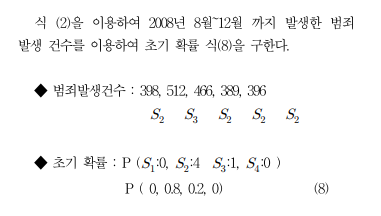

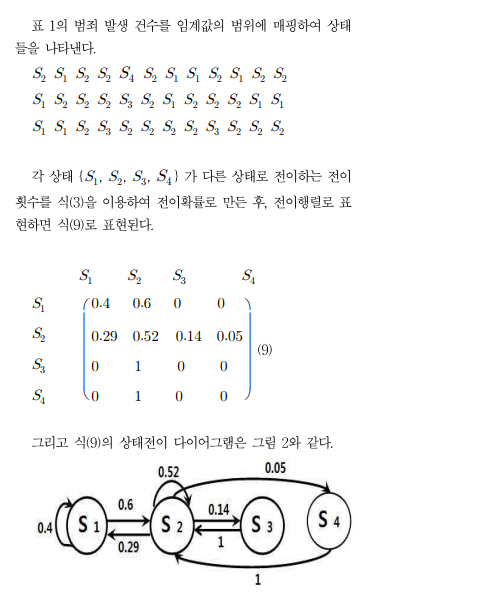

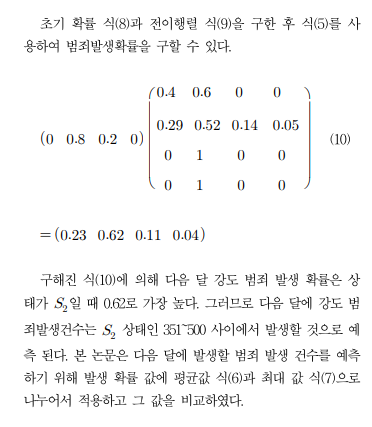

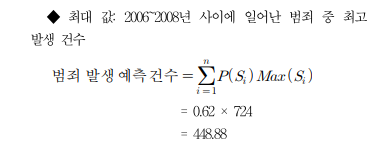